Step 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_h4_3337.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


- There are 200 entries.
- No null values in any columns.

In [5]:
# How many unique values are in each column?
for column in df:
    print(column, df[column].nunique())

CustomerID 200
Gender 2
Age 51
Annual Income (k$) 64
Spending Score (1-100) 84


### Step 2 ###

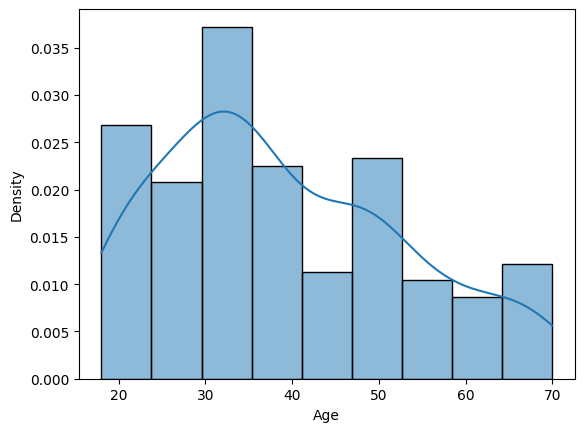

In [6]:
sns.histplot(x=df['Age'], kde=True, stat='density')
plt.show()

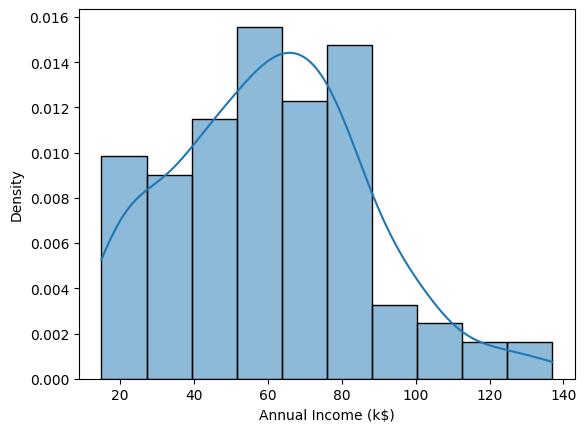

In [7]:
sns.histplot(x=df['Annual Income (k$)'], kde=True, stat='density')
plt.show()

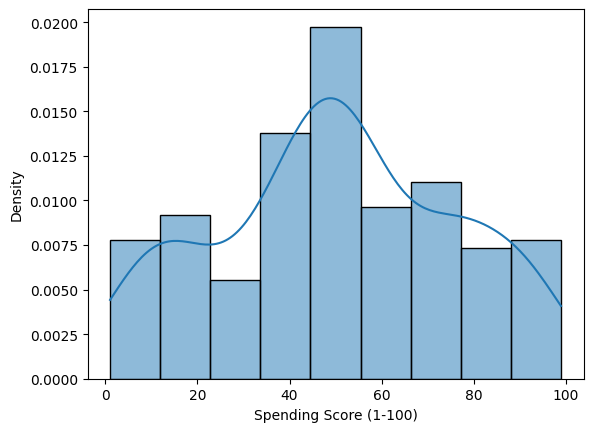

In [8]:
sns.histplot(x=df['Spending Score (1-100)'], kde=True, stat='density')
plt.show()

- Age varies drastically, with most in the range of 20 - 50
- Most people have income from 20k to 80k.
- The highest number of spending score are from 40 - 60.

In [13]:
plt.pie(y=df['Gender'].count(), autopct='%1.1f%%',)

TypeError: pie() got an unexpected keyword argument 'y'